<a href="https://colab.research.google.com/github/JahanviChamria/ExoplanetResearchProject/blob/main/Exoplanet_Research_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exoplanet Detection

In the code below, we set up the environment for the entire project. By running this block, we ensure all the required tools are available for our exoplanet detection analysis.

In [ ]:
from urllib.request import urlretrieve
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import torch
import torch.nn as nn
import torch.nn.functional as F

from sklearn.neural_network import MLPClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, precision_score, confusion_matrix, accuracy_score
from sklearn.cluster import KMeans
from sklearn import  metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from scipy.signal import savgol_filter
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,precision_score,recall_score,f1_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, normalize
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

!pip install keras
!pip install tensorflow
from tensorflow.keras import Sequential
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, Conv2D, MaxPooling2D, BatchNormalization, MaxPooling1D
from keras.losses import categorical_crossentropy
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
from keras import backend as K
from keras import activations, initializers, regularizers, constraints, metrics
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import (Dense, Dropout, Activation, Flatten, Reshape, Layer,
                          BatchNormalization, LocallyConnected2D,
                          ZeroPadding2D, Conv2D, MaxPooling2D, Conv2DTranspose,
                          GaussianNoise, UpSampling2D, Input)
from keras.layers import Lambda

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

Loading the datasets. By loading these datasets into our workspace, we have the raw data ready for preprocessing and analysis.

In [ ]:
df2=pd.read_csv("https://raw.githubusercontent.com/JahanviChamria/Dataset/main/cumulative_2023.10.01_06.22.52.csv")
df=pd.read_csv("https://raw.githubusercontent.com/JahanviChamria/NASADataset/main/cumulative_2023.10.22_03.05.36.csv")

Displaying the Dataset. This code prints the contents of the df dataset to give us an overview of its structure, features, and initial entries. By visualizing the data, we can get a preliminary understanding of what information is available and how it's organized.

In [ ]:
print(df)

         kepid kepoi_name   kepler_name koi_disposition koi_pdisposition  \
0     10797460  K00752.01  Kepler-227 b       CONFIRMED        CANDIDATE   
1     10797460  K00752.02  Kepler-227 c       CONFIRMED        CANDIDATE   
2     10811496  K00753.01           NaN       CANDIDATE        CANDIDATE   
3     10848459  K00754.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
4     10854555  K00755.01  Kepler-664 b       CONFIRMED        CANDIDATE   
...        ...        ...           ...             ...              ...   
9559  10090151  K07985.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
9560  10128825  K07986.01           NaN       CANDIDATE        CANDIDATE   
9561  10147276  K07987.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
9562  10155286  K07988.01           NaN       CANDIDATE        CANDIDATE   
9563  10156110  K07989.01           NaN  FALSE POSITIVE   FALSE POSITIVE   

      koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  \
0       

Understanding the Dataset's Structure

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   kepler_name        2743 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          8054 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_period         9564 non-null   float64
 11  koi_period_err1    9110 non-null   float64
 12  koi_period_err2    9110 non-null   float64
 13  koi_time0bk        9564 non-null   float64
 14  koi_time0bk_err1   9110 non-null   float64
 15  koi_time0bk_err2   9110 non-null   float64
 16  koi_impact         9201 

Data Cleaning and Formatting:

In this block, we're performing a critical step in the data preprocessing pipeline: renaming columns for clarity and ease of understanding. The original columns have concise, sometimes abbreviated names. Here, we're mapping these original names to more descriptive names that provide a clearer indication of what each column represents. For instance:

'kepid' is renamed to 'KepID', which stands for Kepler ID.
'kepoi_name' becomes 'KOIName', representing the Kepler Object of Interest name.
... and so forth for other columns.

After renaming, we display the first few rows of the dataset (df.head()) to quickly inspect the changes and get a glimpse of the data structure.

In [ ]:
df = df.rename(columns={'kepid':'KepID',
'kepoi_name':'KOIName',
'kepler_name':'KeplerName',
'koi_disposition':'ExoplanetArchiveDisposition',
'koi_pdisposition':'DispositionUsingKeplerData',
'koi_score':'DispositionScore',
'koi_fpflag_nt':'NotTransit-LikeFalsePositiveFlag',
'koi_fpflag_ss':'koi_fpflag_ss',
'koi_fpflag_co':'CentroidOffsetFalsePositiveFlag',
'koi_fpflag_ec':'EphemerisMatchIndicatesContaminationFalsePositiveFlag',
'koi_period':'OrbitalPeriod[days',
'koi_period_err1':'OrbitalPeriodUpperUnc.[days',
'koi_period_err2':'OrbitalPeriodLowerUnc.[days',
'koi_time0bk':'TransitEpoch[BKJD',
'koi_time0bk_err1':'TransitEpochUpperUnc.[BKJD',
'koi_time0bk_err2':'TransitEpochLowerUnc.[BKJD',
'koi_impact':'ImpactParamete',
'koi_impact_err1':'ImpactParameterUpperUnc',
'koi_impact_err2':'ImpactParameterLowerUnc',
'koi_duration':'TransitDuration[hrs',
'koi_duration_err1':'TransitDurationUpperUnc.[hrs',
'koi_duration_err2':'TransitDurationLowerUnc.[hrs',
'koi_depth':'TransitDepth[ppm',
'koi_depth_err1':'TransitDepthUpperUnc.[ppm',
'koi_depth_err2':'TransitDepthLowerUnc.[ppm',
'koi_prad':'PlanetaryRadius[Earthradii',
'koi_prad_err1':'PlanetaryRadiusUpperUnc.[Earthradii',
'koi_prad_err2':'PlanetaryRadiusLowerUnc.[Earthradii',
'koi_teq':'EquilibriumTemperature[K',
'koi_teq_err1':'EquilibriumTemperatureUpperUnc.[K',
'koi_teq_err2':'EquilibriumTemperatureLowerUnc.[K',
'koi_insol':'InsolationFlux[Earthflux',
'koi_insol_err1':'InsolationFluxUpperUnc.[Earthflux',
'koi_insol_err2':'InsolationFluxLowerUnc.[Earthflux',
'koi_model_snr':'TransitSignal-to-Nois',
'koi_tce_plnt_num':'TCEPlanetNumbe',
'koi_tce_delivname':'TCEDeliver',
'koi_steff':'StellarEffectiveTemperature[K',
'koi_steff_err1':'StellarEffectiveTemperatureUpperUnc.[K',
'koi_steff_err2':'StellarEffectiveTemperatureLowerUnc.[K',
'koi_slogg':'StellarSurfaceGravity[log10(cm/s**2)',
'koi_slogg_err1':'StellarSurfaceGravityUpperUnc.[log10(cm/s**2)',
'koi_slogg_err2':'StellarSurfaceGravityLowerUnc.[log10(cm/s**2)',
'koi_srad':'StellarRadius[Solarradii',
'koi_srad_err1':'StellarRadiusUpperUnc.[Solarradii',
'koi_srad_err2':'StellarRadiusLowerUnc.[Solarradii',
'ra':'RA[decimaldegrees',
'dec':'Dec[decimaldegrees',
'koi_kepmag':'Kepler-band[mag]'
})
df.head()

,KepID,KOIName,KeplerName,ExoplanetArchiveDisposition,DispositionUsingKeplerData,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,OrbitalPeriod[days,OrbitalPeriodUpperUnc.[days,OrbitalPeriodLowerUnc.[days,TransitEpoch[BKJD,TransitEpochUpperUnc.[BKJD,TransitEpochLowerUnc.[BKJD,ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,TransitDuration[hrs,TransitDurationUpperUnc.[hrs,TransitDurationLowerUnc.[hrs,TransitDepth[ppm,TransitDepthUpperUnc.[ppm,TransitDepthLowerUnc.[ppm,PlanetaryRadius[Earthradii,PlanetaryRadiusUpperUnc.[Earthradii,PlanetaryRadiusLowerUnc.[Earthradii,EquilibriumTemperature[K,EquilibriumTemperatureUpperUnc.[K,EquilibriumTemperatureLowerUnc.[K,InsolationFlux[Earthflux,InsolationFluxUpperUnc.[Earthflux,InsolationFluxLowerUnc.[Earthflux,TransitSignal-to-Nois,TCEPlanetNumbe,TCEDeliver,StellarEffectiveTemperature[K,StellarEffectiveTemperatureUpperUnc.[K,StellarEffectiveTemperatureLowerUnc.[K,StellarSurfaceGravity[log10(cm/s**2),StellarSurfaceGravityUpperUnc.[log10(cm/s**2),StellarSurfaceGravityLowerUnc.[log10(cm/s**2),StellarRadius[Solarradii,StellarRadiusUpperUnc.[Solarradii,StellarRadiusLowerUnc.[Solarradii,RA[decimaldegrees,Dec[decimaldegrees,Kepler-band[mag]
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


Dropping Unnecessary Columns:

In this step, we're further refining our dataset by dropping certain columns that might not be directly beneficial for our analysis or model building.

This process of refining and curating features/columns is a crucial part of data preprocessing, ensuring that our dataset is streamlined and free of unnecessary information, which can aid in both clarity and computational efficiency.

In [ ]:
df.drop(columns=['KeplerName','KOIName','EquilibriumTemperatureUpperUnc.[K',
                 'ExoplanetArchiveDisposition','DispositionUsingKeplerData',
                 'NotTransit-LikeFalsePositiveFlag','koi_fpflag_ss','CentroidOffsetFalsePositiveFlag',
                 'EphemerisMatchIndicatesContaminationFalsePositiveFlag','TCEDeliver',
                 'EquilibriumTemperatureLowerUnc.[K'])

,KepID,DispositionScore,OrbitalPeriod[days,OrbitalPeriodUpperUnc.[days,OrbitalPeriodLowerUnc.[days,TransitEpoch[BKJD,TransitEpochUpperUnc.[BKJD,TransitEpochLowerUnc.[BKJD,ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,TransitDuration[hrs,TransitDurationUpperUnc.[hrs,TransitDurationLowerUnc.[hrs,TransitDepth[ppm,TransitDepthUpperUnc.[ppm,TransitDepthLowerUnc.[ppm,PlanetaryRadius[Earthradii,PlanetaryRadiusUpperUnc.[Earthradii,PlanetaryRadiusLowerUnc.[Earthradii,EquilibriumTemperature[K,InsolationFlux[Earthflux,InsolationFluxUpperUnc.[Earthflux,InsolationFluxLowerUnc.[Earthflux,TransitSignal-to-Nois,TCEPlanetNumbe,StellarEffectiveTemperature[K,StellarEffectiveTemperatureUpperUnc.[K,StellarEffectiveTemperatureLowerUnc.[K,StellarSurfaceGravity[log10(cm/s**2),StellarSurfaceGravityUpperUnc.[log10(cm/s**2),StellarSurfaceGravityLowerUnc.[log10(cm/s**2),StellarRadius[Solarradii,StellarRadiusUpperUnc.[Solarradii,StellarRadiusLowerUnc.[Solarradii,RA[decimaldegrees,Dec[decimaldegrees,Kepler-band[mag]
0,10797460,1.000,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,93.59,29.45,-16.65,35.8,1.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,0.969,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,9.11,2.87,-1.62,25.8,2.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,0.000,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,39.30,31.04,-10.49,76.3,1.0,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,0.000,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,891.96,668.95,-230.35,505.6,1.0,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,1.000,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,926.16,874.33,-314.24,40.9,1.0,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,10090151,0.000,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,1.252,0.051,-0.049,3.22210,0.01740,-0.01740,1579.2,4.6,-4.6,29.35,7.70,-2.57,2088.0,4500.53,3406.38,-1175.26,453.3,1.0,5638.0,139.0,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9560,10128825,0.497,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,-0.007690,0.043,0.423,-0.043,3.11400,0.22900,-0.22900,48.5,5.4,-5.4,0.72,0.24,-0.08,1608.0,1585.81,1537.86,-502.22,10.6,1.0,6119.0,165.0,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9561,10147276,0.021,0.681402,2.434000e-06,-2.434000e-06,132.181750,0.002850,-0.002850,0.147,0.309,-0.147,0.86500,0.16200,-0.16200,103.6,14.7,-14.7,1.07,0.36,-0.11,2218.0,5713.41,5675.74,-1836.94,12.3,1.0,6173.0,193.0,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
9562,10155286,0.092,333.486169,4.235000e-03,-4.235000e-03,153.615010,0.005070,-0.005070,0.214,0.255,-0.214,3.19900,0.22900,-0.22900,639.1,52.7,-52.7,19.30,0.55,-4.68,557.0,22.68,2.07,-10.95,14.0,1.0,4989.0,39.0,-128.0,2.992,0.030,-0.027,7.824,0.223,-1.896,296.76288,47.145142,10.998


Creating a New Column for Exoplanet Confirmation Status:

This code introduces a new column 'ExoplanetConfirmed' that categorizes each observation based on the 'ExoplanetArchiveDisposition' data. We use a binary flag where:
- A value of 1 is given to observations labeled as 'CONFIRMED' or 'CANDIDATE', indicating a positive indication of an exoplanet.
- A value of 0 is assigned otherwise, indicating a non-exoplanet observation.

This binary classification simplifies the dataset, preparing it for models that require labeled input for supervised learning.

In [ ]:
df['ExoplanetConfirmed'] = df['ExoplanetArchiveDisposition'].apply(lambda x: 1 if x == 'CONFIRMED' else 1 if x == 'CANDIDATE' else 0 )

Previewing the Modified Data:

The df.head() function is used to display the first few rows (default: 5) of the dataframe df. This is a quick way to visually inspect the recent changes we've made to the dataset, such as the new column added.

In [ ]:
df.head()

,KepID,KOIName,KeplerName,ExoplanetArchiveDisposition,DispositionUsingKeplerData,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,OrbitalPeriod[days,OrbitalPeriodUpperUnc.[days,OrbitalPeriodLowerUnc.[days,TransitEpoch[BKJD,TransitEpochUpperUnc.[BKJD,TransitEpochLowerUnc.[BKJD,ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,TransitDuration[hrs,TransitDurationUpperUnc.[hrs,TransitDurationLowerUnc.[hrs,TransitDepth[ppm,TransitDepthUpperUnc.[ppm,TransitDepthLowerUnc.[ppm,PlanetaryRadius[Earthradii,PlanetaryRadiusUpperUnc.[Earthradii,PlanetaryRadiusLowerUnc.[Earthradii,EquilibriumTemperature[K,EquilibriumTemperatureUpperUnc.[K,EquilibriumTemperatureLowerUnc.[K,InsolationFlux[Earthflux,InsolationFluxUpperUnc.[Earthflux,InsolationFluxLowerUnc.[Earthflux,TransitSignal-to-Nois,TCEPlanetNumbe,TCEDeliver,StellarEffectiveTemperature[K,StellarEffectiveTemperatureUpperUnc.[K,StellarEffectiveTemperatureLowerUnc.[K,StellarSurfaceGravity[log10(cm/s**2),StellarSurfaceGravityUpperUnc.[log10(cm/s**2),StellarSurfaceGravityLowerUnc.[log10(cm/s**2),StellarRadius[Solarradii,StellarRadiusUpperUnc.[Solarradii,StellarRadiusLowerUnc.[Solarradii,RA[decimaldegrees,Dec[decimaldegrees,Kepler-band[mag],ExoplanetConfirmed
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,1
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,1


Checking the Dimensions of the Data:

The df.shape attribute returns a tuple representing the dimensions of the dataframe df. Specifically, it provides the number of rows and columns present in the dataframe.

In [ ]:
df.shape

(9564, 50)

Data Cleaning - Removing Unwanted Columns:

This code tidies up our dataset by eliminating columns that are not necessary for our analysis or predictive modeling. The columns removed may include identifiers, columns with excessive missing values, or those that do not contribute predictive power to our models. The inplace=True argument ensures that the changes are applied directly to the dataframe without needing to reassign it to a new variable.

In [ ]:
df.drop(columns=['KeplerName','KOIName','EquilibriumTemperatureUpperUnc.[K',
                 'ExoplanetArchiveDisposition','DispositionUsingKeplerData',
                 'NotTransit-LikeFalsePositiveFlag','koi_fpflag_ss','CentroidOffsetFalsePositiveFlag',
                 'EphemerisMatchIndicatesContaminationFalsePositiveFlag','TCEDeliver',
                 'EquilibriumTemperatureLowerUnc.[K'], inplace=True)

In [ ]:
df.shape

(9564, 39)


Checking for Missing Values:

This line of code inspects the dataframe for any missing entries across all columns, which is pivotal for ensuring the integrity of our dataset. Missing data can significantly affect the performance of machine learning models, and identifying these gaps early allows us to take appropriate measures, such as imputation or removal, to maintain data quality.

The output will be a series that lists each column with a Boolean value: True indicates the presence of at least one missing value in that column, and False indicates no missing values.



In [ ]:
df.isna().any()

KepID                                            False
DispositionScore                                  True
OrbitalPeriod[days                               False
OrbitalPeriodUpperUnc.[days                       True
OrbitalPeriodLowerUnc.[days                       True
TransitEpoch[BKJD                                False
TransitEpochUpperUnc.[BKJD                        True
TransitEpochLowerUnc.[BKJD                        True
ImpactParamete                                    True
ImpactParameterUpperUnc                           True
ImpactParameterLowerUnc                           True
TransitDuration[hrs                              False
TransitDurationUpperUnc.[hrs                      True
TransitDurationLowerUnc.[hrs                      True
TransitDepth[ppm                                  True
TransitDepthUpperUnc.[ppm                         True
TransitDepthLowerUnc.[ppm                         True
PlanetaryRadius[Earthradii                        True
PlanetaryR

Handling Missing Values:

This code block uses the dropna() function to remove any rows in the dataframe df that contain missing values (NaN). By using inplace=True, the changes are applied directly to the dataframe df without the need to reassign it.

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(7803, 39)

In [ ]:
df.head()

,KepID,DispositionScore,OrbitalPeriod[days,OrbitalPeriodUpperUnc.[days,OrbitalPeriodLowerUnc.[days,TransitEpoch[BKJD,TransitEpochUpperUnc.[BKJD,TransitEpochLowerUnc.[BKJD,ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,TransitDuration[hrs,TransitDurationUpperUnc.[hrs,TransitDurationLowerUnc.[hrs,TransitDepth[ppm,TransitDepthUpperUnc.[ppm,TransitDepthLowerUnc.[ppm,PlanetaryRadius[Earthradii,PlanetaryRadiusUpperUnc.[Earthradii,PlanetaryRadiusLowerUnc.[Earthradii,EquilibriumTemperature[K,InsolationFlux[Earthflux,InsolationFluxUpperUnc.[Earthflux,InsolationFluxLowerUnc.[Earthflux,TransitSignal-to-Nois,TCEPlanetNumbe,StellarEffectiveTemperature[K,StellarEffectiveTemperatureUpperUnc.[K,StellarEffectiveTemperatureLowerUnc.[K,StellarSurfaceGravity[log10(cm/s**2),StellarSurfaceGravityUpperUnc.[log10(cm/s**2),StellarSurfaceGravityLowerUnc.[log10(cm/s**2),StellarRadius[Solarradii,StellarRadiusUpperUnc.[Solarradii,StellarRadiusLowerUnc.[Solarradii,RA[decimaldegrees,Dec[decimaldegrees,Kepler-band[mag],ExoplanetConfirmed
0,10797460,1.000,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,93.59,29.45,-16.65,35.8,1.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1
1,10797460,0.969,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,9.11,2.87,-1.62,25.8,2.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1
2,10811496,0.000,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,39.30,31.04,-10.49,76.3,1.0,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,1
3,10848459,0.000,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,891.96,668.95,-230.35,505.6,1.0,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0
4,10854555,1.000,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,926.16,874.33,-314.24,40.9,1.0,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,1


Cleaning the Dataset:

 The clean_dataset function is a safeguard to ensure that the dataframe contains only valid numerical values. It checks that the input is indeed a Pandas DataFrame, then removes rows with any missing (NaN) or infinite values (inf, -inf).

 Finally, it ensures all numerical values are converted to a floating-point format. This function is then applied to the dataframe with the KepID column removed, preparing it for modeling where an index or identifier column isn't needed.

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

clean_dataset(df.drop(columns=['KepID']))

,DispositionScore,OrbitalPeriod[days,OrbitalPeriodUpperUnc.[days,OrbitalPeriodLowerUnc.[days,TransitEpoch[BKJD,TransitEpochUpperUnc.[BKJD,TransitEpochLowerUnc.[BKJD,ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,TransitDuration[hrs,TransitDurationUpperUnc.[hrs,TransitDurationLowerUnc.[hrs,TransitDepth[ppm,TransitDepthUpperUnc.[ppm,TransitDepthLowerUnc.[ppm,PlanetaryRadius[Earthradii,PlanetaryRadiusUpperUnc.[Earthradii,PlanetaryRadiusLowerUnc.[Earthradii,EquilibriumTemperature[K,InsolationFlux[Earthflux,InsolationFluxUpperUnc.[Earthflux,InsolationFluxLowerUnc.[Earthflux,TransitSignal-to-Nois,TCEPlanetNumbe,StellarEffectiveTemperature[K,StellarEffectiveTemperatureUpperUnc.[K,StellarEffectiveTemperatureLowerUnc.[K,StellarSurfaceGravity[log10(cm/s**2),StellarSurfaceGravityUpperUnc.[log10(cm/s**2),StellarSurfaceGravityLowerUnc.[log10(cm/s**2),StellarRadius[Solarradii,StellarRadiusUpperUnc.[Solarradii,StellarRadiusLowerUnc.[Solarradii,RA[decimaldegrees,Dec[decimaldegrees,Kepler-band[mag],ExoplanetConfirmed
0,1.000,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,93.59,29.45,-16.65,35.8,1.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1.0
1,0.969,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,9.11,2.87,-1.62,25.8,2.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1.0
2,0.000,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,39.30,31.04,-10.49,76.3,1.0,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,1.0
3,0.000,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,891.96,668.95,-230.35,505.6,1.0,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0.0
4,1.000,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,926.16,874.33,-314.24,40.9,1.0,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,0.000,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,1.252,0.051,-0.049,3.22210,0.01740,-0.01740,1579.2,4.6,-4.6,29.35,7.70,-2.57,2088.0,4500.53,3406.38,-1175.26,453.3,1.0,5638.0,139.0,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082,0.0
9560,0.497,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,-0.007690,0.043,0.423,-0.043,3.11400,0.22900,-0.22900,48.5,5.4,-5.4,0.72,0.24,-0.08,1608.0,1585.81,1537.86,-502.22,10.6,1.0,6119.0,165.0,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757,1.0
9561,0.021,0.681402,2.434000e-06,-2.434000e-06,132.181750,0.002850,-0.002850,0.147,0.309,-0.147,0.86500,0.16200,-0.16200,103.6,14.7,-14.7,1.07,0.36,-0.11,2218.0,5713.41,5675.74,-1836.94,12.3,1.0,6173.0,193.0,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385,0.0
9562,0.092,333.486169,4.235000e-03,-4.235000e-03,153.615010,0.005070,-0.005070,0.214,0.255,-0.214,3.19900,0.22900,-0.22900,639.1,52.7,-52.7,19.30,0.55,-4.68,557.0,22.68,2.07,-10.95,14.0,1.0,4989.0,39.0,-128.0,2.992,0.030,-0.027,7.824,0.223,-1.896,296.76288,47.145142,10.998,1.0


In [ ]:
df.head()

,KepID,DispositionScore,OrbitalPeriod[days,OrbitalPeriodUpperUnc.[days,OrbitalPeriodLowerUnc.[days,TransitEpoch[BKJD,TransitEpochUpperUnc.[BKJD,TransitEpochLowerUnc.[BKJD,ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,TransitDuration[hrs,TransitDurationUpperUnc.[hrs,TransitDurationLowerUnc.[hrs,TransitDepth[ppm,TransitDepthUpperUnc.[ppm,TransitDepthLowerUnc.[ppm,PlanetaryRadius[Earthradii,PlanetaryRadiusUpperUnc.[Earthradii,PlanetaryRadiusLowerUnc.[Earthradii,EquilibriumTemperature[K,InsolationFlux[Earthflux,InsolationFluxUpperUnc.[Earthflux,InsolationFluxLowerUnc.[Earthflux,TransitSignal-to-Nois,TCEPlanetNumbe,StellarEffectiveTemperature[K,StellarEffectiveTemperatureUpperUnc.[K,StellarEffectiveTemperatureLowerUnc.[K,StellarSurfaceGravity[log10(cm/s**2),StellarSurfaceGravityUpperUnc.[log10(cm/s**2),StellarSurfaceGravityLowerUnc.[log10(cm/s**2),StellarRadius[Solarradii,StellarRadiusUpperUnc.[Solarradii,StellarRadiusLowerUnc.[Solarradii,RA[decimaldegrees,Dec[decimaldegrees,Kepler-band[mag],ExoplanetConfirmed
0,10797460,1.000,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,93.59,29.45,-16.65,35.8,1.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1
1,10797460,0.969,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,9.11,2.87,-1.62,25.8,2.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1
2,10811496,0.000,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,39.30,31.04,-10.49,76.3,1.0,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,1
3,10848459,0.000,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,891.96,668.95,-230.35,505.6,1.0,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0
4,10854555,1.000,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,926.16,874.33,-314.24,40.9,1.0,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,1



Evaluation Function:

- Named evaluation, this function accepts the true labels (y_true) and predicted labels (y_pred) as its arguments.
- It calculates and displays the following metrics for model performance:

> - Accuracy: Proportion of correct predictions among the total number of cases processed.
- Recall: Ability of the model to identify all relevant instances.
- F1 Score: The harmonic mean of Precision and Recall.
- Precision: Ability of the classifier not to label a negative sample as positive.

- Additionally, a Confusion Matrix is printed and visualized. The matrix provides a clearer picture of false and true negatives and positives.

----

In [ ]:
# Evaluation function

def evaluation(y_true, y_pred):

# Print Accuracy, Recall, F1 Score, and Precision metrics.
    print('Evaluation Metrics:')
    accuracy=accuracy_score(y_test, y_pred)
    precision=precision_score(y_test, y_pred)
    print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))
    print('Recall: ' + str(recall_score(y_test, y_pred)))
    print('F1 Score: ' + str(f1_score(y_test, y_pred)))
    print('Precision: ' + str(precision_score(y_test, y_pred)))

# Print Confusion Matrix
    print('\nConfusion Matrix:')
    print(' TN,  FP, FN, TP')
    print(confusion_matrix(y_true, y_pred).ravel())
    cm=confusion_matrix(y_true,y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)

    return accuracy, precision

# Function Prints best parameters for GridSearchCV
def print_results(results):
    print('Best Parameters: {}\n'.format(results.best_params_))

Feature Selection:

- Features: This block defines the input features and target variable for the machine learning model. The 'features' variable includes all columns of the dataframe 'df', excluding 'ExoplanetConfirmed' and 'KepID', which contain the classification status and identifier of the exoplanets, respectively.

- Target: The 'target' variable is set to the 'ExoplanetConfirmed' column, which indicates the confirmed status of exoplanet candidates.

By preparing the feature set and target variable separately, we can effectively train predictive models to determine the likelihood of celestial bodies being confirmed as exoplanets based on their observed characteristics.

In [ ]:
features = df.drop(columns=['ExoplanetConfirmed','KepID'])
target = df.ExoplanetConfirmed

Data Splitting
1. Training set (X_train and y_train): This set is used to train the model. It contains 40% of the total data.
2. Testing set (X_test and y_test): This set is used to evaluate the model's performance. It contains 60% of the total data.

- The train_test_split function from the Scikit-learn library is used to perform this split. The random_state parameter is set to 1 to ensure reproducibility, meaning the data split will be consistent in subsequent runs.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=1, test_size=.60)

In [ ]:
# Checking if train test split ran correclty
for dataset in [y_train, y_test]:
    print(round(len(dataset)/len(target), 2))

0.4
0.6


#Logistic Regression Model
We're initializing a balanced logistic regression model, training it on the provided dataset, making predictions using the test data, and then evaluating its performance using various metrics.


Evaluation Metrics:
Accuracy: 0.811191798376762
Recall: 0.8601485148514851
F1 Score: 0.8250890383854372
Precision: 0.7927756653992395

Confusion Matrix:
 TN,  FP, FN, TP
[1713  545  339 2085]


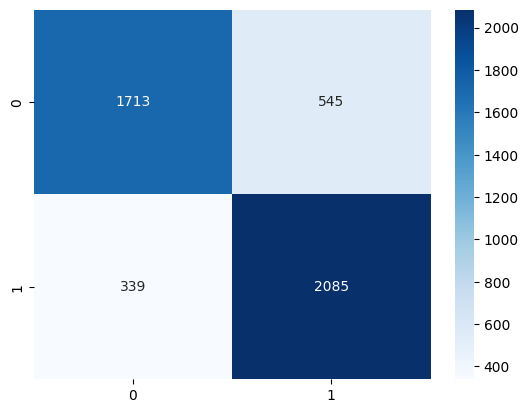

In [ ]:
# Logistic Regression Model
lr = LogisticRegression(C=100, max_iter=200, class_weight='balanced')

# Fitting Model to the train set
lr.fit(X_train, y_train)

# Predicting on the test set
y_pred = lr.predict(X_test)

# Evaluating model
alr,plr=evaluation(y_test, y_pred)

#KNN Model
We're setting up a k-nearest neighbors classifier with specified parameters, training it on our data, making predictions on the test set, and evaluating its accuracy and precision.

Evaluation Metrics:
Accuracy: 0.8007261853908586
Recall: 0.8498349834983498
F1 Score: 0.8153572135365129
Precision: 0.7835678965386078

Confusion Matrix:
 TN,  FP, FN, TP
[1689  569  364 2060]


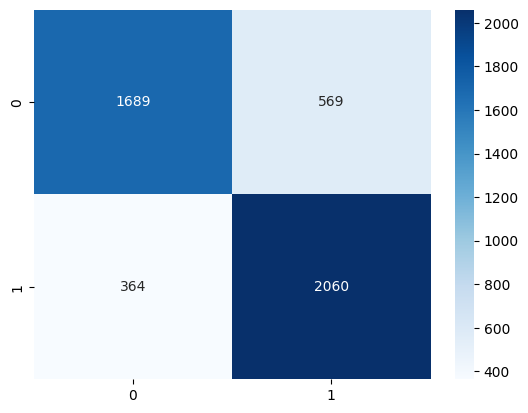

In [ ]:
knn = KNeighborsClassifier(leaf_size=8, metric='manhattan',weights='uniform')

# Fitting Model to the train set
knn.fit(X_train, y_train)

# Predicting on the test set
y_pred = knn.predict(X_test)

# Evaluating model
ak,pk=evaluation(y_test, y_pred)

#Decision tree Classifier
We're establishing a Decision Tree classifier, training it with our data, making predictions using the test set, and then assessing its performance using various metrics.

Evaluation Metrics:
Accuracy: 0.9284493806065783
Recall: 0.926980198019802
F1 Score: 0.9306274591012632
Precision: 0.9343035343035343

Confusion Matrix:
 TN,  FP, FN, TP
[2100  158  177 2247]


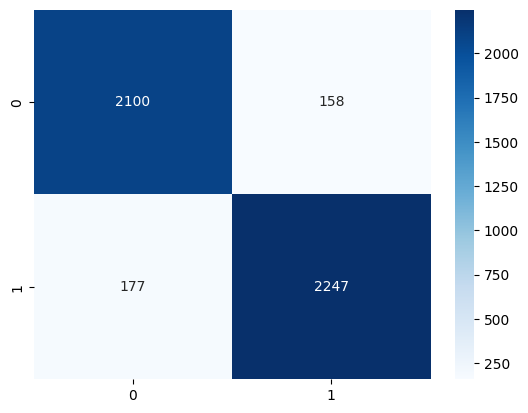

In [ ]:
tree = DecisionTreeClassifier()

# Fitting Model to the train set
tree.fit(X_train, y_train)

# Predicting on the test set
y_pred = tree.predict(X_test)

# Evaluating model
at,pt=evaluation(y_test, y_pred)

#Forest Classifier

We're creating a Random Forest classifier with 100 trees, training it on the dataset, predicting using the test data, and subsequently evaluating its performance metrics.

Evaluation Metrics:
Accuracy: 0.9589918838103375
Recall: 0.9484323432343235
F1 Score: 0.9599164926931106
Precision: 0.9716821639898563

Confusion Matrix:
 TN,  FP, FN, TP
[2191   67  125 2299]


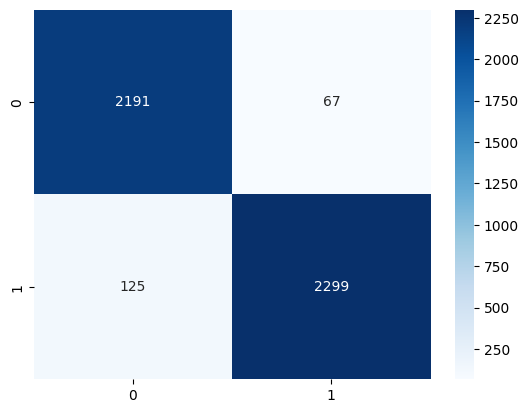

In [ ]:
# Instantiate model
forest1 = RandomForestClassifier(n_estimators=100, criterion='gini')
# Fitting Model to the train set
forest1.fit(X_train, y_train)
# Predicting on the test set
y_pred = forest1.predict(X_test)

# Evaluating model
af,pf=evaluation(y_test, y_pred)

Displaying the accuracy and precision of the Random Forest classifier as percentages.

In [ ]:
print('Accuracy: ' + str(af*100))
print('Precision: ' + str(pf*100))

Accuracy: 95.89918838103375
Precision: 97.16821639898563


This block of code is dedicated to visualizing the accuracy of the various models we've built and tested. Here's a step-by-step breakdown:
1. Initialize Lists:
> - acc: A list of accuracy scores for the different models: Logistic Regression, KNN, Decision Tree, and Random Forest.
> - pr: A list of precision scores for these models, although this list is not used in the presented plot.

2. Categories: A list named categories containing the names of the models, which will be used as labels for the x-axis of our bar chart.

3. Plotting:
> - plt.bar(): Creates a bar chart with the model names on the x-axis and their corresponding accuracy scores on the y-axis. The bars are colored sky blue.
> - plt.xlabel(), plt.ylabel(), and plt.title(): These functions set labels for the x-axis, y-axis, and the chart title, respectively.
> - plt.ylim(): Sets the y-axis limits to range from 0 to 1. This makes sense as accuracy scores range between these values (0% to 100%).
> - plt.show(): Finally, this displays the created bar chart.

- The resulting visualization allows us to easily compare the accuracy of the different models.

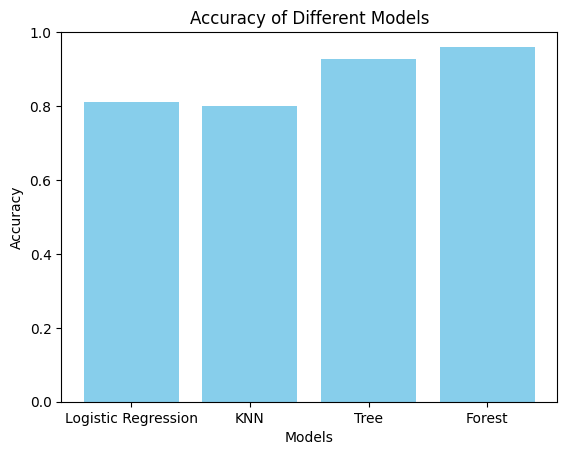

In [ ]:
acc=[alr,ak,at,af]
pr=[plr,pk,pt,pf]
categories = ['Logistic Regression', 'KNN', 'Tree', 'Forest']
plt.bar(categories, acc, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)  # Set the y-axis limits (0 to 1 for accuracy)
plt.show()

Now we are visualizing the precision of the different models rather than the accuracy. Precision is the measure of how many of the positive identifications were actually correct.

Just as with accuracy, the precision values are plotted against the different models to prvide a clear comparison. The y-axis is limited to values between 0 and 1, since precision is a percentage represented as a decimal between these values.

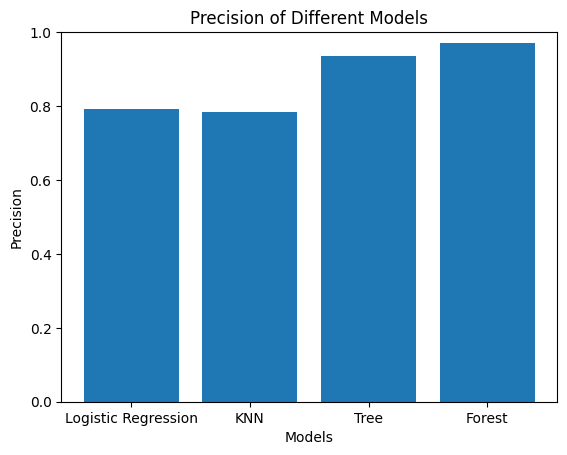

In [ ]:
acc=[alr,ak,at,af]
pr=[plr,pk,pt,pf]
categories = ['Logistic Regression', 'KNN', 'Tree', 'Forest']
plt.bar(categories, pr)
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Precision of Different Models')
plt.ylim(0, 1)  # Set the y-axis limits (0 to 1 for accuracy)
plt.show()

The below code block creates a bar chart using the matplotlib library to visualize the number of planets:

- It compares two categories: the "Total number of planets" and the "Exoplanets confirmed."
- The actual numbers for these categories are 7803 and 4068 respectively.
- The bar chart is labeled on the y-axis with "Number of Exoplanets."

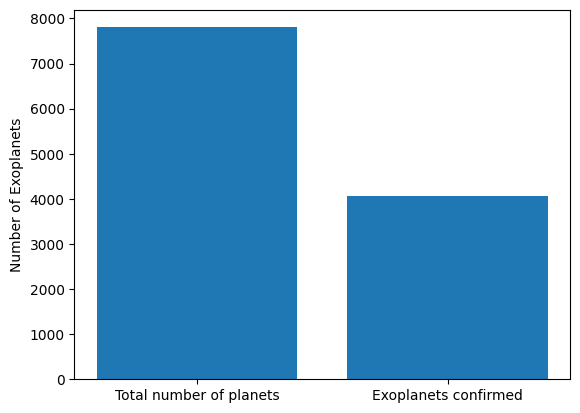

In [ ]:
numpl=[7803, 4068]
categories=['Total number of planets','Exoplanets confirmed']
plt.bar(categories, numpl)
plt.ylabel('Number of Exoplanets')
plt.show()

#Determining the habitability of the exoplanets

The below line of code outputs essential information about the `df2` dataframe, offering insights into the data types present, the number of non-null values in each column, and the dataframe's memory footprint. It's a preliminary step to understand the dataset's structure before diving into deeper analysis or model training.

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 83 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2743 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_vet_stat       9564 non-null   object 
 6   koi_vet_date       9564 non-null   object 
 7   koi_pdisposition   9564 non-null   object 
 8   koi_score          8054 non-null   float64
 9   koi_fpflag_nt      9564 non-null   int64  
 10  koi_fpflag_ss      9564 non-null   int64  
 11  koi_fpflag_co      9564 non-null   int64  
 12  koi_fpflag_ec      9564 non-null   int64  
 13  koi_disp_prov      9564 non-null   object 
 14  koi_comment        8355 non-null   object 
 15  koi_period         9564 non-null   float64
 16  koi_time0bk        9564 

We're updating the column names in the dataframe df2 to ensure they are clear and meaningful. This helps in making the data more understandable and accessible for anyone examining the dataset.

In [ ]:
df2 = df2.rename(columns={'kepid':'KepID',
'koi_score':'DispositionScore',
'koi_prad':'PlanetaryRadius[Earthradii',
'koi_teq':'EquilibriumTemperature[K',
'koi_insol':'InsolationFlux[Earthflux',
'koi_steff':'StellarEffectiveTemperature[K',
'koi_slogg':'StellarSurfaceGravity[log10(cm/s**2)',
})

We're storing the names of all columns in the dataframe `df2` into a list called `cn`. This will be used in functions that require a list of features.

In [ ]:
cn=df2.columns.values.tolist()

The `print(cn)` statement is used to output the list of column names that we previously stored in `cn`. This provides a quick way to visually confirm the structure and names of the data we are working with.

In [ ]:
print(cn)

['rowid', 'KepID', 'kepoi_name', 'kepler_name', 'koi_disposition', 'koi_vet_stat', 'koi_vet_date', 'koi_pdisposition', 'DispositionScore', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_disp_prov', 'koi_comment', 'koi_period', 'koi_time0bk', 'koi_time0', 'koi_eccen', 'koi_longp', 'koi_impact', 'koi_duration', 'koi_ingress', 'koi_depth', 'koi_ror', 'koi_srho', 'koi_fittype', 'PlanetaryRadius[Earthradii', 'koi_sma', 'koi_incl', 'EquilibriumTemperature[K', 'InsolationFlux[Earthflux', 'koi_dor', 'koi_limbdark_mod', 'koi_ldm_coeff4', 'koi_ldm_coeff3', 'koi_ldm_coeff2', 'koi_ldm_coeff1', 'koi_parm_prov', 'koi_max_sngle_ev', 'koi_max_mult_ev', 'koi_model_snr', 'koi_count', 'koi_num_transits', 'koi_tce_plnt_num', 'koi_tce_delivname', 'koi_quarters', 'koi_bin_oedp_sig', 'koi_trans_mod', 'koi_model_dof', 'koi_model_chisq', 'koi_datalink_dvr', 'koi_datalink_dvs', 'StellarEffectiveTemperature[K', 'StellarSurfaceGravity[log10(cm/s**2)', 'koi_smet', 'koi_srad', 'koi_smass',

This code narrows down our dataset to include only the columns that are relevant for our habitability analysis. By specifying the column names in a list, we ensure that only these columns are retained in `df2`.

In [ ]:
df2=df2[['KepID','DispositionScore','PlanetaryRadius[Earthradii','EquilibriumTemperature[K','koi_sma','InsolationFlux[Earthflux','StellarEffectiveTemperature[K','StellarSurfaceGravity[log10(cm/s**2)','koi_srad','koi_eccen','koi_incl','koi_dor']]

This code block defines a function habitability_score to calculate a habitability score for each exoplanet based on various criteria. The function takes an exoplanet (a row from a dataframe) as input and calculates a score based on how well the exoplanet meets the defined habitability criteria.

Habitability Scoring Function:
- Planetary Radius: Scores a point if the planet's radius is within 0.8 to 1.5 times Earth's radius, suggesting it might be rocky and capable of maintaining an atmosphere.
- Habitable Zone Check: Calls the helper function is_in_habitable_zone to assess whether the exoplanet's orbit lies within a habitable zone based on the host star's temperature and the exoplanet's semi-major axis. This function returns 1 if the conditions are met.
- Stellar Surface Gravity: Adds a point if the star's surface gravity falls within the range conducive to habitability (4.0 to 4.9 in log10(cm/s²)).
- Equilibrium Temperature: Awards a point if the planet's temperature is in the range of 273K to 373K, suggesting the possibility of liquid water.
- Planetary Density/Type of Planet: Gives a full or half point based on the planet's radius, distinguishing between likely rocky planets and gas giants or mini-Neptunes.
- Radiative Flux/Insolation: Checks if the planet's insolation flux is within a habitable range, calculated based on the star's temperature and other parameters.
- Eccentricity: Scores a point for low eccentricity orbits (<= 0.2), indicating a stable, circular orbit.
- Obliquity: Awards a point if the planet's axial tilt is within 45 degrees, suggesting potentially stable seasons.

**Scoring Mechanism:** The function habitability_score computes a score for each exoplanet based on several habitability criteria. Each criterion satisfied adds points to the exoplanet's total habitability score.

**Criteria for Scoring:** The habitability score is determined by assessing various planetary and stellar characteristics against predefined habitable ranges. These characteristics include planetary radius, orbit semi-major axis, stellar surface gravity, equilibrium temperature, planetary density, radiative flux, eccentricity, and obliquity.

**Application and Visualization:** After calculating the habitability scores, these scores will be plotted to visualize the distribution of potentially habitable exoplanets in the dataset. Higher scores indicate exoplanets with conditions more conducive to life as we know it.

In [ ]:
def habitability_score(exoplanet):
    import math
    score = 0

    # Planetary radius
    min_planetary_radius = 0.8  #Minimum radius as a factor of Earth's radius
    max_planetary_radius = 1.5  #Maximum radius as a factor of Earth's radius
    #Assuming 'PlanetaryRadius[Earthradii]' is the column with radius data relative to Earth's radius
    if min_planetary_radius <= exoplanet['PlanetaryRadius[Earthradii'] <= max_planetary_radius:
      score += 1

    # Orbit sem-major axis
    #helper function to check if the exoplanet is in the habitable zone depending on the host star type
    def is_in_habitable_zone(stellar_temp, semi_major_axis):
        if 0.1 <= semi_major_axis <= 5:
             return 1
        else:
             return 0

       #checking if exoplanet is in the habitable zone
    if is_in_habitable_zone(exoplanet['StellarEffectiveTemperature[K'], exoplanet['koi_sma']):
        score += 1

    # Stellar surface gravity
    if 4.0 <= exoplanet['StellarSurfaceGravity[log10(cm/s**2)'] <= 4.9:
        score += 1

    # Equilibrium temperature
    if 273 <= exoplanet['EquilibriumTemperature[K'] <= 373:
        score += 1

    #Type of planet (Planetary density)
    if exoplanet['PlanetaryRadius[Earthradii']<=1.5:
      score +=1
    elif 1.5<exoplanet['PlanetaryRadius[Earthradii']<=2.5:
      score +=0.5

    # Radiative flux/insolation/HZ
    fmax=(5.670374419*math.pow(10,-8)*math.pow(exoplanet['StellarEffectiveTemperature[K'],4))/(4*math.pi*(exoplanet['koi_dor']*exoplanet['koi_srad']))
    if 67 <= exoplanet['InsolationFlux[Earthflux'] <= fmax:
        score += 1

    #Eccentricity
    if exoplanet['koi_eccen'] <= 0.2:
        score += 1

    # Obliquity
    if (90-exoplanet['koi_incl']) <= 45:
        score += 1

    return score

This code block focuses on preparing a specific subset of the dataset for further analysis regarding habitability:

1) **Filtering Confirmed Exoplanets:** Initially, the dataset df is filtered to include only those entries where exoplanets are confirmed (indicated by ExoplanetConfirmed equal to 1). This subset, stored in confirmed_exoplanets, contains only the relevant data for exoplanets that are officially recognized.

2) **Extracting IDs of Confirmed Exoplanets:** The Kepler IDs (KepID) of these confirmed exoplanets are extracted and stored in ce. This step isolates the unique identifiers of each confirmed exoplanet.

3) **Creating a New DataFrame (df3):** A new DataFrame, df3, is initialized with specific columns relevant to the habitability analysis. This DataFrame is meant to consolidate the data necessary for evaluating the habitability scores.

4) **Populating df3 with Confirmed Exoplanets:** The DataFrame df3 is then populated with rows from df2 that correspond to the Kepler IDs in ce. This means df3 will only contain data for confirmed exoplanets.

5) **Resetting the Index:** The index of df3 is reset for clarity and to maintain consistency, ensuring that the DataFrame is neatly organized for subsequent operations.

6) **Final Dataset for Habitability Analysis:** The resulting df3 DataFrame now holds targeted data specifically for confirmed exoplanets, aligned with the columns critical for determining their habitability scores. This streamlined dataset is essential for an efficient and focused habitability assessment.

In [ ]:
# Filtering the dataset for confirmed exoplanets only
confirmed_exoplanets = df[df['ExoplanetConfirmed'] == 1]
ce=confirmed_exoplanets['KepID']
print(ce)

data =[]
df3 = pd.DataFrame(data, index=[], columns=['KepID','DispositionScore','PlanetaryRadius[Earthradii','EquilibriumTemperature[K','koi_sma','InsolationFlux[Earthflux','StellarEffectiveTemperature[K','StellarSurfaceGravity[log10(cm/s**2)','koi_srad','koi_eccen','koi_incl','koi_dor'])

df3 = df2[df2['KepID'].isin(ce)]

# Reset the index of df3
df3.reset_index(drop=True, inplace=True)

# Now df3 contains the rows from df2 with matching KepID values for confirmed exoplanets
print(df3)

0       10797460
1       10797460
2       10811496
4       10854555
5       10872983
          ...   
9538     9938836
9542    10011213
9552    10028127
9560    10128825
9562    10155286
Name: KepID, Length: 4068, dtype: int64
         KepID  DispositionScore  PlanetaryRadius[Earthradii  \
0     10797460             1.000                        2.26   
1     10797460             0.969                        2.83   
2     10811496             0.000                       14.60   
3     10854555             1.000                        2.75   
4     10872983             1.000                        3.90   
...        ...               ...                         ...   
4231   9938836             0.843                        1.66   
4232  10011213             0.189                        3.26   
4233  10028127             0.519                        3.72   
4234  10128825             0.497                        0.72   
4235  10155286             0.092                       19.30   

    

This code block removes rows with missing values from the DataFrame `df3` using the `dropna()` method with `inplace=True`, ensuring the dataset is complete and free of NaNs for accurate habitability analysis.

In [ ]:
df3.dropna(inplace=True)

The `habitability_score` function is applied to each row of `df3` to calculate a habitability score, creating a new column 'HabitabilityScore' in the DataFrame.

A count of exoplanets for each habitability score is obtained using `value_counts()` and sorted.

A bar chart visualizes the distribution of exoplanets across different habitability scores, indicating the number of exoplanets at each score level. This provides a clear visual representation of how many exoplanets potentially meet the criteria for habitability.

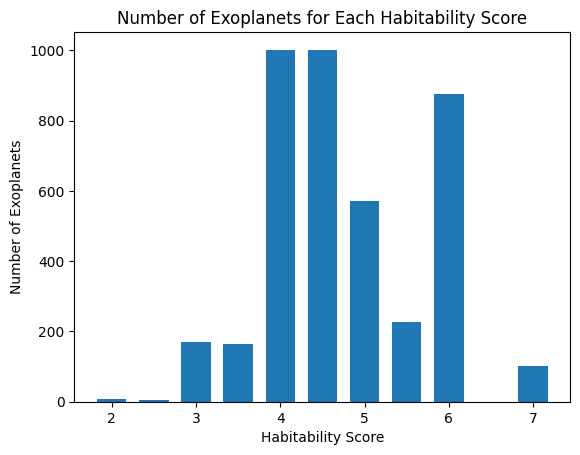

In [ ]:
df3['HabitabilityScore'] = df3.apply(habitability_score, axis=1)

habitability_scores = df3['HabitabilityScore']
count_per_score = habitability_scores.value_counts().sort_index()

# Create a bar chart
plt.bar(count_per_score.index, count_per_score.values, width=0.35)

# Label the axes and add a title
plt.xlabel('Habitability Score')
plt.ylabel('Number of Exoplanets')
plt.title('Number of Exoplanets for Each Habitability Score')

# Show the plot
plt.show()

In [ ]:
df3['HabitabilityScore']

0       4.5
1       4.0
2       4.0
3       4.0
4       4.0
       ... 
4231    3.5
4232    4.0
4233    4.0
4234    5.0
4235    3.0
Name: HabitabilityScore, Length: 4126, dtype: float64

Here we will plot all the conditions individually on a bar graph. Each chart will represent the distribution of exoplanets that meet the respective habitability condition.

##Planetary Radius

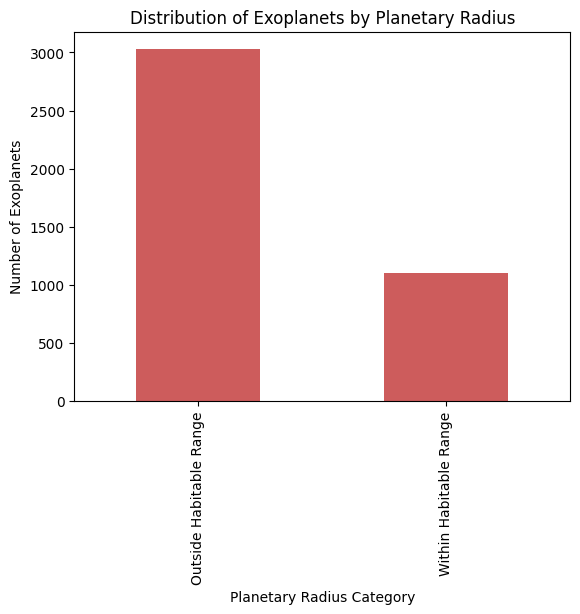

In [ ]:
#checking the habitable radius and counting
radius_count = (df3['PlanetaryRadius[Earthradii'].between(0.8, 1.5)).value_counts()

#renaming index for clarity
radius_count.index = ['Outside Habitable Range', 'Within Habitable Range']

#plotting
radius_count.plot(kind='bar', color='indianred', title='Distribution of Exoplanets by Planetary Radius')
plt.xlabel('Planetary Radius Category')
plt.ylabel('Number of Exoplanets')
plt.show()

##Orbit Semi-major Axis

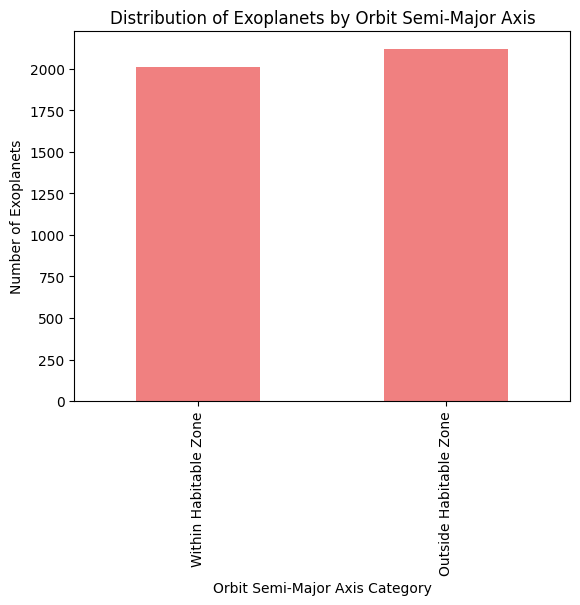

In [ ]:
#counting the number of exoplanets in and out of the habitable zone based on semi-major axis
in_habitable_zone = 0
out_of_habitable_zone = 0

for index, exoplanet in df3.iterrows():
    if 0.1 <= exoplanet['koi_sma'] <= 5:
        in_habitable_zone += 1
    else:
        out_of_habitable_zone += 1

#creating a series for plotting
sma_count = pd.Series([in_habitable_zone, out_of_habitable_zone], index=['Within Habitable Zone', 'Outside Habitable Zone'])

#plotting
sma_count.plot(kind='bar', color='lightcoral', title='Distribution of Exoplanets by Orbit Semi-Major Axis')
plt.xlabel('Orbit Semi-Major Axis Category')
plt.ylabel('Number of Exoplanets')
plt.show()

##Stellar Surface Gravity

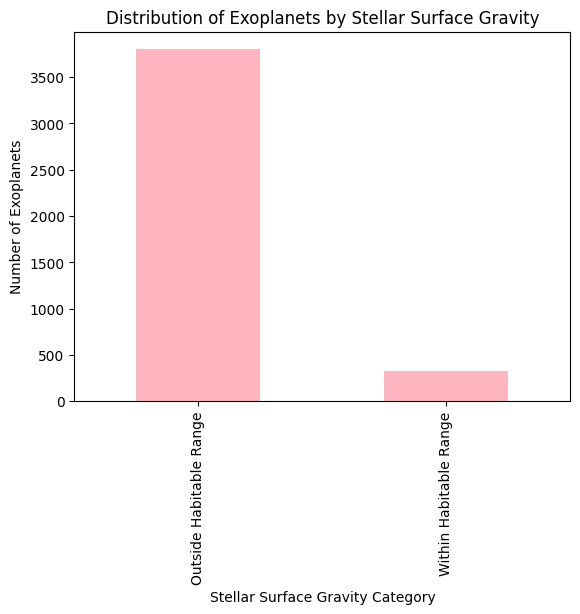

In [ ]:
#checking the stellar surface gravity and counting
radius_count = (df3['StellarSurfaceGravity[log10(cm/s**2)'].between(4.0, 4.9)).value_counts()

#renaming index for clarity
radius_count.index = ['Outside Habitable Range', 'Within Habitable Range']

#plotting
radius_count.plot(kind='bar', color='lightpink', title='Distribution of Exoplanets by Stellar Surface Gravity')
plt.xlabel('Stellar Surface Gravity Category')
plt.ylabel('Number of Exoplanets')
plt.show()

##Equilibrium Temperature

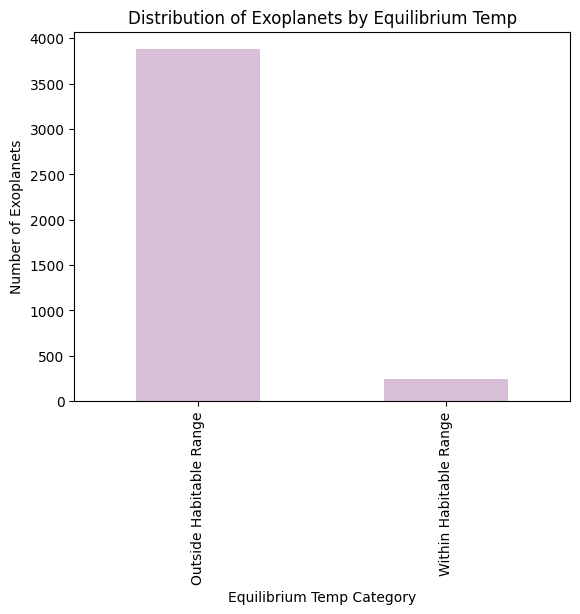

In [ ]:
#checking the equilibrium and counting
radius_count = (df3['EquilibriumTemperature[K'].between(273, 373)).value_counts()

#renaming index for clarity
radius_count.index = ['Outside Habitable Range', 'Within Habitable Range']

#plotting
radius_count.plot(kind='bar', color='thistle', title='Distribution of Exoplanets by Equilibrium Temp')
plt.xlabel('Equilibrium Temp Category')
plt.ylabel('Number of Exoplanets')
plt.show()

##Planetary Density

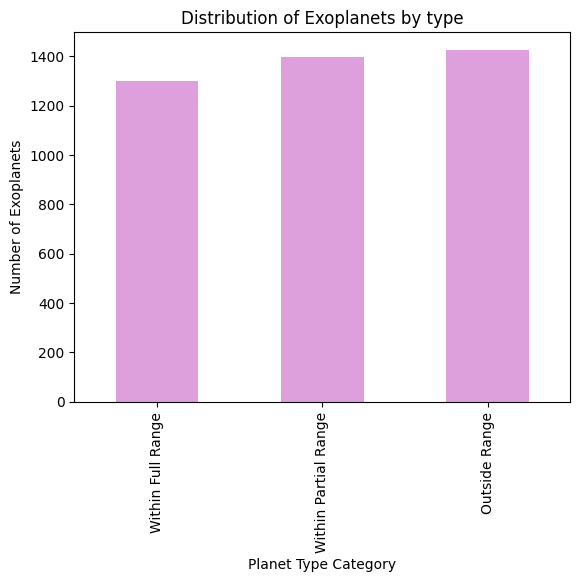

In [ ]:
#counting the number of exoplanets in each category
within_full_range = (df3['PlanetaryRadius[Earthradii'] <= 1.5).sum()
within_partial_range = ((df3['PlanetaryRadius[Earthradii'] > 1.5) & (df3['PlanetaryRadius[Earthradii'] <= 2.5)).sum()
outside_range = (df3['PlanetaryRadius[Earthradii'] > 2.5).sum()

#creating a series for plotting
type_count = pd.Series([within_full_range, within_partial_range, outside_range], index=['Within Full Range', 'Within Partial Range', 'Outside Range'])

#plotting
type_count.plot(kind='bar', color='plum', title='Distribution of Exoplanets by type')
plt.xlabel('Planet Type Category')
plt.ylabel('Number of Exoplanets')
plt.show()

##Radiative Flux

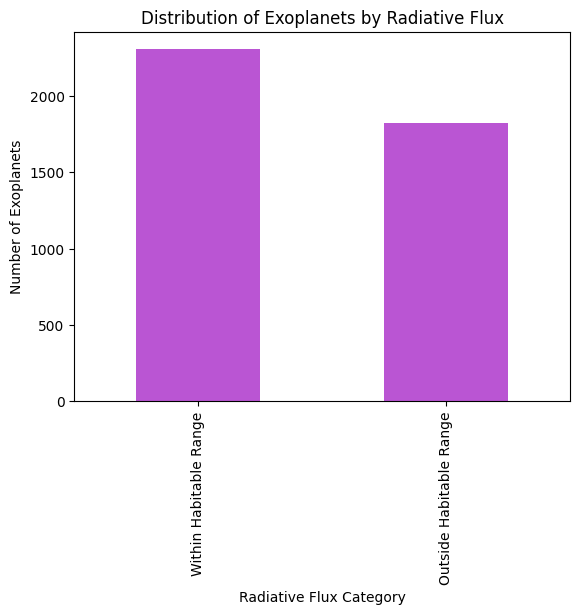

In [ ]:
import math
#counting the number of exoplanets in and out of the habitable zone based on radiative flux
in_habitable_range = 0
out_of_habitable_range = 0

for index, exoplanet in df3.iterrows():
    fmax = (5.670374419 * math.pow(10, -8) * math.pow(exoplanet['StellarEffectiveTemperature[K'], 4)) / (4 * math.pi * (exoplanet['koi_dor'] * exoplanet['koi_srad']))
    if 67 <= exoplanet['InsolationFlux[Earthflux'] <= fmax:
        in_habitable_range += 1
    else:
        out_of_habitable_range += 1

#creating a series for plotting
radiative_flux_count = pd.Series([in_habitable_range, out_of_habitable_range], index=['Within Habitable Range', 'Outside Habitable Range'])

#plotting
radiative_flux_count.plot(kind='bar', color='mediumorchid', title='Distribution of Exoplanets by Radiative Flux')
plt.xlabel('Radiative Flux Category')
plt.ylabel('Number of Exoplanets')
plt.show()

##Eccentricity

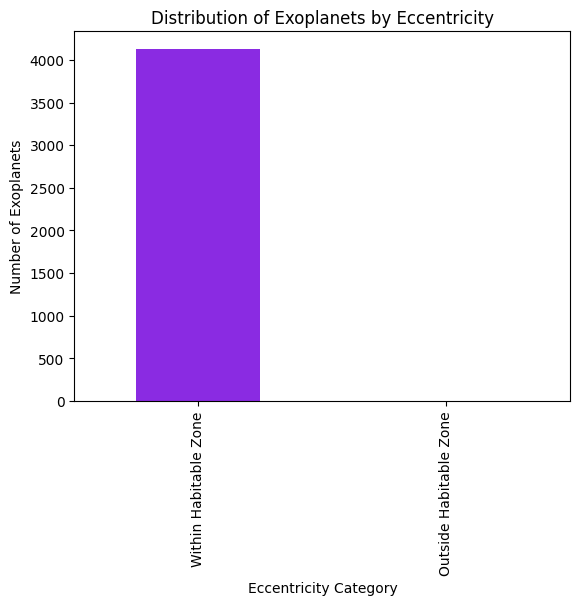

In [ ]:
#counting the number of exoplanets in and out of the habitable zone based on eccentricity
in_habitable_zone = 0
out_of_habitable_zone = 0

for index, exoplanet in df3.iterrows():
    if exoplanet['koi_eccen'] <= 0.2:
        in_habitable_zone += 1
    else:
        out_of_habitable_zone += 1

#creating a series for plotting
ecount = pd.Series([in_habitable_zone, out_of_habitable_zone], index=['Within Habitable Zone', 'Outside Habitable Zone'])

#plotting
ecount.plot(kind='bar', color='blueviolet', title='Distribution of Exoplanets by Eccentricity')
plt.xlabel('Eccentricity Category')
plt.ylabel('Number of Exoplanets')
plt.show()

##Obliquity

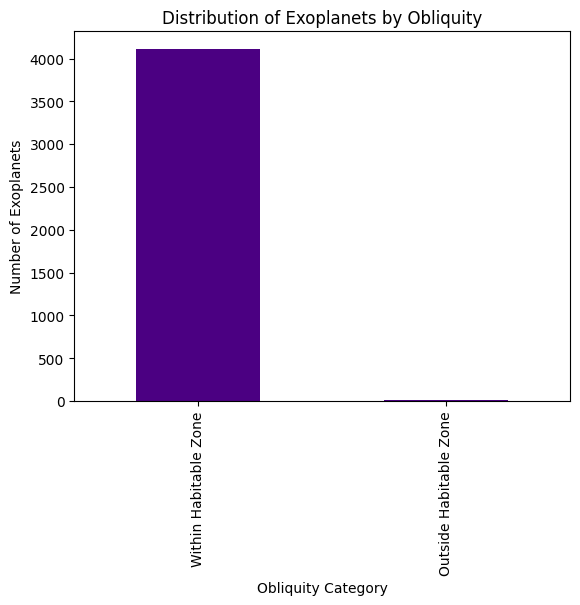

In [ ]:
#counting the number of exoplanets in and out of the habitable zone based on obliquity
in_habitable_zone = 0
out_of_habitable_zone = 0

for index, exoplanet in df3.iterrows():
    if (90-exoplanet['koi_incl']) <= 45:
        in_habitable_zone += 1
    else:
        out_of_habitable_zone += 1

#creating a series for plotting
ocount = pd.Series([in_habitable_zone, out_of_habitable_zone], index=['Within Habitable Zone', 'Outside Habitable Zone'])

#plotting
ocount.plot(kind='bar', color='indigo', title='Distribution of Exoplanets by Obliquity')
plt.xlabel('Obliquity Category')
plt.ylabel('Number of Exoplanets')
plt.show()

This code block prepares the dataset for machine learning by splitting it into training and testing sets:

- Features are selected from df3, excluding `HabitabilityScore` and `KepID`.
- The `HabitabilityScore` column is set as the target variable.
- The dataset is divided using `train_test_split`, allocating 60% for testing and 40% for training.
- The proportion of data in the training and testing sets is printed to verify the split.

In [ ]:
print(df3)

         KepID  DispositionScore  PlanetaryRadius[Earthradii  \
0     10797460             1.000                        2.26   
1     10797460             0.969                        2.83   
2     10811496             0.000                       14.60   
3     10854555             1.000                        2.75   
4     10872983             1.000                        3.90   
...        ...               ...                         ...   
4231   9938836             0.843                        1.66   
4232  10011213             0.189                        3.26   
4233  10028127             0.519                        3.72   
4234  10128825             0.497                        0.72   
4235  10155286             0.092                       19.30   

      EquilibriumTemperature[K  koi_sma  InsolationFlux[Earthflux  \
0                        793.0   0.0853                     93.59   
1                        443.0   0.2734                      9.11   
2                       

In [ ]:
features = df3.drop(columns=['HabitabilityScore','KepID'])
target = df3.HabitabilityScore

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=16, test_size=.60)

# Checking if train test split ran correctly
for dataset in [y_train, y_test]:
    print(round(len(dataset)/len(target), 2))

0.4
0.6


#KNN

- Initializes a KNN classifier with specified parameters (leaf size, metric, and weight).
- Ensures target labels (`y_train and y_test`) are integers for compatibility with the classifier.
- Trains the model on the training set (`X_train`, `y_train`).
- Predicts habitability scores on the test set (`X_tes`t).
- Evaluates the model's performance, calculating accuracy and displaying a confusion matrix and classification report.

In [ ]:
#instantiating the KNN model
knn = KNeighborsClassifier(leaf_size=8, metric='manhattan', weights='uniform')

#converting y_train to integer if it's binary/categorical
y_train = y_train.astype('int')
#ensuring y_test is categorical
y_test = y_test.astype('int')

#fitting the model to the training set
knn.fit(X_train, y_train)

#predicting the habitability scores on the test set
y_pred = knn.predict(X_test)

#evaluating the model using the evaluation function or directly with metrics
print("KNN Model Evaluation:")

#calculating and printing the accuracy
accuracy_knn = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_knn:.2f}")

#generating and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

#generating a classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)

KNN Model Evaluation:
Accuracy: 0.53

Confusion Matrix:
 [[  3   1   2   0   0   0]
 [  5  72  70  27  32   0]
 [  0  36 898  90 162   2]
 [  1  36 177 207  74  13]
 [  0  15 320  36 133   0]
 [  0   0  13  42   6   3]]

Classification Report:
               precision    recall  f1-score   support

           2       0.33      0.50      0.40         6
           3       0.45      0.35      0.39       206
           4       0.61      0.76      0.67      1188
           5       0.51      0.41      0.45       508
           6       0.33      0.26      0.29       504
           7       0.17      0.05      0.07        64

    accuracy                           0.53      2476
   macro avg       0.40      0.39      0.38      2476
weighted avg       0.51      0.53      0.51      2476



#Forest

- Initializes a Random Forest classifier with 100 decision trees and a criterion for splitting (`gini`).
- Fits the model to the training data.
- Predicts habitability scores using the test data.
- Evaluates the model, providing accuracy, confusion matrix, and classification report to understand its performance in classifying exoplanets based on habitability scores.

In [ ]:
#instantiating the Random Forest model
forest = RandomForestClassifier(n_estimators=100, criterion='gini')

#fitting the model to the training set
forest.fit(X_train, y_train)

#predicting the habitability scores on the test set
y_pred = forest.predict(X_test)

#evaluting the model
print("Random Forest Model Evaluation:")

#calculating and printing the accuracy
accuracy_forest = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_forest:.2f}")

#generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

#generating a classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)

Random Forest Model Evaluation:
Accuracy: 0.98

Confusion Matrix:
 [[   2    3    1    0    0    0]
 [   0  197    9    0    0    0]
 [   0    3 1180    5    0    0]
 [   0    0   15  484    9    0]
 [   0    0    0    2  499    3]
 [   0    0    0    0    5   59]]

Classification Report:
               precision    recall  f1-score   support

           2       1.00      0.33      0.50         6
           3       0.97      0.96      0.96       206
           4       0.98      0.99      0.99      1188
           5       0.99      0.95      0.97       508
           6       0.97      0.99      0.98       504
           7       0.95      0.92      0.94        64

    accuracy                           0.98      2476
   macro avg       0.98      0.86      0.89      2476
weighted avg       0.98      0.98      0.98      2476



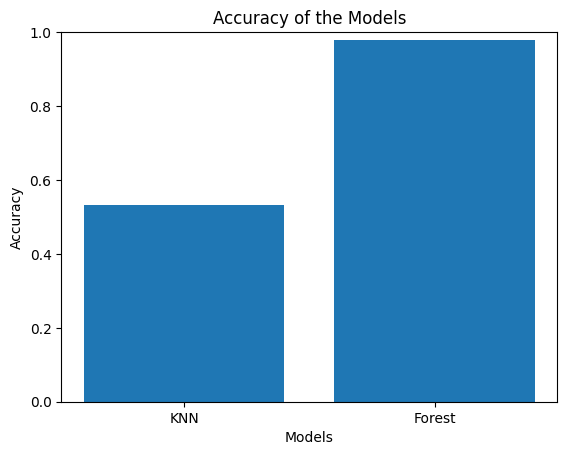

In [ ]:
acc=[accuracy_knn,accuracy_forest]
categories = ['KNN', 'Forest']
plt.bar(categories, acc)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of the Models')
plt.ylim(0, 1)  # Set the y-axis limits (0 to 1 for accuracy)
plt.show()

#Exoplanet Prediction Using User Input

**Exoplanet Prediction Function:**

- Function Purpose: This function, `exoplanetprediction`, is designed to predict whether a given celestial object is an exoplanet. It uses the trained Random Forest model (`forest1`) for this prediction.

- Feature Handling:
  - Input Features: The function first defines the primary input features related to the celestial object's characteristics (like `DispositionScore`, `OrbitalPeriod[days]`, etc.).
  - Default Features: It sets default values (0) for additional features necessary for the model but not provided by the user.
  - Data Collection: The function collects input values either directly from the user or from a provided list (`iv`), depending on the mode of execution.

- Dataframe Creation:
  - The collected data is then converted into a pandas DataFrame (`input_df`), structured to match the model's expected input format.

- Model Prediction:
  - Utilizing the `forest1` model, the function predicts the class label (exoplanet or not) based on the provided data.

- Output:
  - The function prints a statement indicating whether the celestial object is likely an exoplanet based on the model's prediction.

In [ ]:
def exoplanetprediction(iv):
  #defining the feature names for which we'll take inputs
  input_features = [
    'DispositionScore', 'OrbitalPeriod[days', 'TransitEpoch[BKJD', 'ImpactParamete',
    'TransitDuration[hrs', 'TransitDepth[ppm', 'PlanetaryRadius[Earthradii',
    'EquilibriumTemperature[K', 'InsolationFlux[Earthflux', 'TransitSignal-to-Nois',
    'TCEPlanetNumbe', 'StellarEffectiveTemperature[K', 'StellarSurfaceGravity[log10(cm/s**2)',
    'StellarRadius[Solarradii', 'RA[decimaldegrees', 'Dec[decimaldegrees', 'Kepler-band[mag]'
  ]

  #setting default values (0) for other features
  default_features = [
    'OrbitalPeriodUpperUnc.[days', 'OrbitalPeriodLowerUnc.[days', 'TransitEpochUpperUnc.[BKJD',
    'TransitEpochLowerUnc.[BKJD', 'ImpactParameterUpperUnc', 'ImpactParameterLowerUnc',
    'TransitDurationUpperUnc.[hrs', 'TransitDurationLowerUnc.[hrs', 'TransitDepthUpperUnc.[ppm',
    'TransitDepthLowerUnc.[ppm', 'PlanetaryRadiusUpperUnc.[Earthradii', 'PlanetaryRadiusLowerUnc.[Earthradii',
    'InsolationFluxUpperUnc.[Earthflux', 'InsolationFluxLowerUnc.[Earthflux', 'StellarEffectiveTemperatureUpperUnc.[K',
    'StellarEffectiveTemperatureLowerUnc.[K', 'StellarSurfaceGravityUpperUnc.[log10(cm/s**2)',
    'StellarSurfaceGravityLowerUnc.[log10(cm/s**2)', 'StellarRadiusUpperUnc.[Solarradii',
    'StellarRadiusLowerUnc.[Solarradii'
  ]


  allfeatures=['DispositionScore', 'OrbitalPeriod[days',
       'OrbitalPeriodUpperUnc.[days', 'OrbitalPeriodLowerUnc.[days',
       'TransitEpoch[BKJD', 'TransitEpochUpperUnc.[BKJD',
       'TransitEpochLowerUnc.[BKJD', 'ImpactParamete',
       'ImpactParameterUpperUnc', 'ImpactParameterLowerUnc',
       'TransitDuration[hrs', 'TransitDurationUpperUnc.[hrs',
       'TransitDurationLowerUnc.[hrs', 'TransitDepth[ppm',
       'TransitDepthUpperUnc.[ppm', 'TransitDepthLowerUnc.[ppm',
       'PlanetaryRadius[Earthradii', 'PlanetaryRadiusUpperUnc.[Earthradii',
       'PlanetaryRadiusLowerUnc.[Earthradii', 'EquilibriumTemperature[K',
       'InsolationFlux[Earthflux', 'InsolationFluxUpperUnc.[Earthflux',
       'InsolationFluxLowerUnc.[Earthflux', 'TransitSignal-to-Nois',
       'TCEPlanetNumbe', 'StellarEffectiveTemperature[K',
       'StellarEffectiveTemperatureUpperUnc.[K',
       'StellarEffectiveTemperatureLowerUnc.[K',
       'StellarSurfaceGravity[log10(cm/s**2)',
       'StellarSurfaceGravityUpperUnc.[log10(cm/s**2)',
       'StellarSurfaceGravityLowerUnc.[log10(cm/s**2)',
       'StellarRadius[Solarradii', 'StellarRadiusUpperUnc.[Solarradii',
       'StellarRadiusLowerUnc.[Solarradii', 'RA[decimaldegrees',
       'Dec[decimaldegrees', 'Kepler-band[mag]']

  input_data = {}
  c=0
  for feature in allfeatures:
    if feature in default_features:
        input_data[feature] = [0]
    else:
      if len(iv)==0:
      #taking inputs for each feature
        value = float(input(f"{feature}: "))
        input_data[feature] = [value]
      else:
        if len(iv)==17:
          value = float(iv[c])
          input_data[feature] = [value]
          c+=1


  #converting the input data into a DataFrame
  input_df = pd.DataFrame(input_data)

  #making a prediction using the trained Forest model
  predicted_label = forest1.predict(input_df)

  #output the prediction result
  if predicted_label[0] == 1:
      print("The celestial object is an exoplanet.")
  else:
      print("The celestial object is not an exoplanet.")

##CASE STUDIES

Here we will check how accurate our detection model is by passing the variables of some already identified and confirmed exoplanet and some non-exoplanets. Our model should print a statement that says, "The celestial object is an exoplanet." if we pass an exoplanet, otherwise it will print "The celestial object is not an exoplanet."

##Kepler-12b

In [ ]:
#A confirmed exoplanet
kepler12b=[0.76, 4.43, 171, 0.069, 4.69, 16387.6, 18.05, 1338, 757.65, 3535.6, 1, 5953, 4.175, 1.415, 286.24, 50.04, 13.438]
exoplanetprediction(kepler12b)

The celestial object is an exoplanet.


##Kepler-441 b



In [ ]:
#A confirmed exoplanet in the Habitable Zone
kepler441b=[0.975, 207.24, 213.03, 0.21, 6.159, 809.2, 1.56, 189, 0.3, 13.2, 1, 4339, 4.711, 0.553, 284.56, 49.01, 15.14]
exoplanetprediction(kepler441b)

The celestial object is an exoplanet.


##K07622

In [ ]:
#A confirmed non-exoplanet
k07622=[0, 36.26, 155.08, 0.214, 2.065, 627.1, 1.5, 347, 3.44, 10, 1, 4264, 4.637, 0.62, 291.02, 36.91, 15.544]
exoplanetprediction(k07622)

The celestial object is not an exoplanet.


#Habitability Prediction Using User Input

**Habitability Prediction Function:**
- Function Overview: The function `habitabilityprediction` is crafted to assess the habitability potential of an exoplanet candidate. It operates in two modes: direct user input or pre-defined input data.


- Input Collection:
  - User Input Mode: If no input data (`inputdata`) is provided, the function prompts the user to enter details like planetary radius, orbit semi-major axis, and other relevant parameters.
  - Pre-defined Input Mode: If `inputdata` is provided, the function directly uses these values without prompting for user input.


- Data Transformation:
  - The collected or provided data is structured into a pandas DataFrame (`candidate_df`), tailored to match the format expected by the habitability scoring function.


- Habitability Scoring:
  - Utilizing the `habitability_score` function, the habitability potential of the exoplanet candidate is calculated based on the defined criteria.


- Output:
  - The function outputs the habitability score as a percentage, indicating the likelihood of the exoplanet being habitable. This percentage is derived by comparing the obtained score against the maximum possible score.

In [ ]:
def habitabilityprediction(inputdata):
  if len(inputdata)==0:
    #Taking inputs
    print("Enter the details of the exoplanet candidate:")
    planetary_radius = float(input("Planetary Radius (in Earth radii): "))
    orbit_semi_major_axis = float(input("Orbit Semi-Major Axis (in AU): "))
    stellar_surface_gravity = float(input("Stellar Surface Gravity (log10(cm/s^2)): "))
    equilibrium_temperature = float(input("Equilibrium Temperature (in K): "))
    planetary_density = float(input("Planetary Density (Type of Planet, in Earth radii): "))
    radiative_flux = float(input("Radiative Flux (Earth flux): "))
    eccentricity = float(input("Eccentricity: "))
    obliquity = 90-float(input("Obliquity (degrees): "))
    koi_dor = float(input("Distance to Star (AU): "))
    koi_srad = float(input("Stellar Radius (Solar radii): "))
    stellartemp=float(input("Stellar Effective Temperature (in K):"))
  else:
    planetary_radius = float(inputdata[0])
    orbit_semi_major_axis = float(inputdata[1])
    stellar_surface_gravity = float(inputdata[2])
    equilibrium_temperature = float(inputdata[3])
    planetary_density = float(inputdata[4])
    radiative_flux = float(inputdata[5])
    eccentricity = float(inputdata[6])
    obliquity = 90-float(inputdata[7])
    koi_dor = float(inputdata[8])
    koi_srad = float(inputdata[9])
    stellartemp=float(inputdata[10])
  #creating a dataframe with the given exoplanet candidate values
  data = {
    'PlanetaryRadius[Earthradii': [planetary_radius],
    'koi_sma': [orbit_semi_major_axis],
    'StellarSurfaceGravity[log10(cm/s**2)': [stellar_surface_gravity],
    'EquilibriumTemperature[K': [equilibrium_temperature],
    'PlanetaryDensity': [planetary_density],
    'InsolationFlux[Earthflux': [radiative_flux],
    'koi_eccen': [eccentricity],
    'koi_incl': [obliquity],  #converting obliquity to inclination
    'koi_dor': [koi_dor],
    'koi_srad': [koi_srad],
    'StellarEffectiveTemperature[K':[stellartemp]
  }
  candidate_df = pd.DataFrame(data)

  #calculating the habitability score
  candidate_df['HabitabilityScore'] = candidate_df.apply(habitability_score, axis=1)
  print(f"The exoplanet has a {int(100*candidate_df['HabitabilityScore'].iloc[0]/8)}% potential of being habitable.")

#CASE STUDIES

Here we will check how accurate our model us by running the variables of some already identified and comfirmed exoplanets.
The model will return a statement which will tell us how habitable (in percentage) the exoplanet we passed through it is.

##Kepler-296 e

In [ ]:
#A confirmed exoplanet in the habitable zone
kep296e=[1.06, 0.169, 4.866, 248, 4.1, 0.89, 0.33, 0.11, 136.2, 0.118, 3526]
habitabilityprediction(kep296e)

The exoplanet has a 62% potential of being habitable.


##Kepler-186 f

In [ ]:
#A confirmed exoplanet
kepler186f=[1.18, 0.35, 4.8, 177, 1.18, 0.23, 0.04, 0.04, 0.43, 0.443, 3751]
habitabilityprediction(kepler186f)

The exoplanet has a 75% potential of being habitable.
